# Downloading data

In [92]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
from torch.utils.data import DataLoader, ConcatDataset

import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split


In [93]:
# Download MNIST train dataset 
train_dataset = dsets.MNIST(root='.', train=True, transform=transforms.ToTensor(), download=True)

# Download MNIST test dataset
dataset = dsets.MNIST(root='.', train=False, transform=transforms.ToTensor(), download=True)

We use train_test_split from sklearn that splits the dataset into test and validation datasets. The train dataset contains 60000 data points. Similarly validation and test datasets contain 6500 and 3500 data points.

In [94]:
# Split the dataset into validation and test sets
val_dataset, test_dataset = train_test_split(dataset, train_size = .65, shuffle=True)

print("length of train, validation and test datasets:", len(train_dataset), len(val_dataset),len(test_dataset))

length of train, validation and test datasets: 60000 6500 3500


We concatenate train and validation dataset to create a large dataset called final_dataset with 66500 data points. And keep aside test dataset for testing the generated model.

In [95]:
final_dataset = ConcatDataset([train_dataset, val_dataset])
print("length of concatenated dataset:", len(final_dataset))

length of concatenated dataset: 66500


Classes represented by the images in the MNIST dataset

In [96]:
classes = train_dataset.classes
print(classes)

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


# Evaluating the data

MNIST train dataset has 60000 samples where each sample is a tuple with two elements. First element represents the image of size [1,28,28] and second element gives the actual label(number between 0 to 9) representing the image. 

In [97]:
# Evaluating the train data
print("Value of first element:", type(final_dataset[0]),len(final_dataset[0]))
print("Value of second element:",type(final_dataset[1]),len(final_dataset[1]))

Value of first element: <class 'tuple'> 2
Value of second element: <class 'tuple'> 2


In [98]:
print("First element:", final_dataset[0])

First element: (tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000,

In [99]:
print("Image representation of the first element:", type(final_dataset[0][0]),final_dataset[0][0].size())
print("Label of the first element:", type(final_dataset[0][1]), final_dataset[0][1])

Image representation of the first element: <class 'torch.Tensor'> torch.Size([1, 28, 28])
Label of the first element: <class 'int'> 5


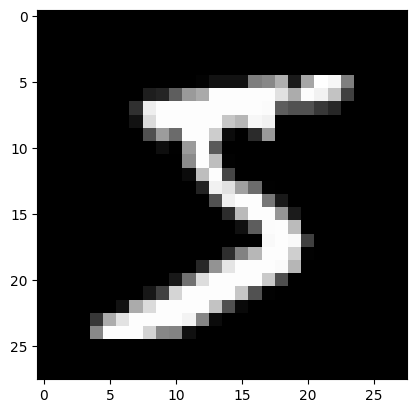

In [100]:
show_img = final_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

In [101]:
print("Image representation of the second element:", type(final_dataset[1][0]),final_dataset[1][0].size())
print("Label of the second element:", type(final_dataset[1][1]), final_dataset[1][1])

Image representation of the second element: <class 'torch.Tensor'> torch.Size([1, 28, 28])
Label of the second element: <class 'int'> 0


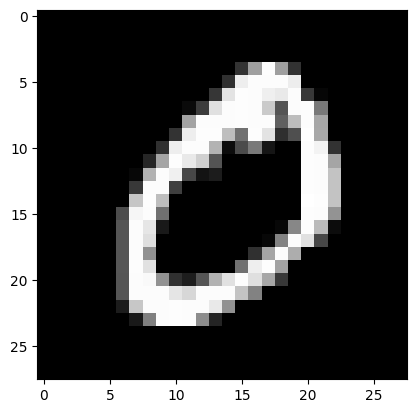

In [102]:
show_img = final_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

# Initializations

Since an image is of the size 28X28, hence we consider input dimension of each image to be 28X28.

The output of each image is a vector with the predicted probability of each number from 0 to 9. The predicted label would be the number with the highest probability. Hence the output dimension is considered as 10. 

Mean squared error (MSE) loss used for linear regression is not useful in case of classification as it makes the whole function non-convex. It is difficult to find global minimum in case of non-convex functions. Hence in logistic regression, we use cross entropy loss.

In pytorch, for binary classification we use Binary cross entropy loss (BCELoss). In case of multi-class classification as required in this example, CrossEntropyLoss() is used. 

In [103]:
epochs = 50
k_folds = 5
input_dim = 28*28
output_dim = 10
learning_rate = 0.1
kfold = KFold(n_splits=k_folds, shuffle=True)
criterion = torch.nn.CrossEntropyLoss()  

# Train the model using kFold Cross Validation 

Train the model using kFold Cross Validation as it improves the accuracy of the model trained. 

For linear regression, we use the linear function a^T x+b. But for logistic regression, which basically is a classification technique requires sigmoid function 1/1+e^-(a^T x+b) to convert the output to the value between 0 and 1. 

We define a custom model class LogisticRegression by extending the torch.nn.Module class. _init_ method initialize the weights and bias using torch.nn.Linear() method. Forward method computes the predicted value using the given functions.



In [104]:
class LogisticRegression(torch.nn.Module):
 
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim) 
        
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [105]:
def reset_weights(m):
    for layer in m.children():
        if hasattr(layer, 'reset_parameters'):
            print(f'Reset trainable parameters of layer = {layer}')
            layer.reset_parameters()

The image part of an element of the train loader is of size [100,1,28,28]. We need to reshape the image part to [100,28 X 28], which means that second dimension is 784 (28 X 28).

In [106]:
# Splits the data automatically into train_ids and val_ids
for fold, (train_ids, val_ids) in enumerate(kfold.split(final_dataset)):
    print(f"[{fold}] Train Ids: {train_ids}, Validation Ids: {val_ids}\n")

    # Add these ids to subsampler to create samples randomly in each fold.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    val_subsampler = torch.utils.data.SubsetRandomSampler(val_ids)

[0] Train Ids: [    0     1     2 ... 66497 66498 66499], Validation Ids: [   10    14    21 ... 66479 66480 66489]

[1] Train Ids: [    0     1     4 ... 66497 66498 66499], Validation Ids: [    2     3     7 ... 66488 66492 66496]

[2] Train Ids: [    0     2     3 ... 66494 66496 66498], Validation Ids: [    1     6    18 ... 66495 66497 66499]

[3] Train Ids: [    0     1     2 ... 66496 66497 66499], Validation Ids: [    8    11    12 ... 66482 66483 66498]

[4] Train Ids: [    1     2     3 ... 66497 66498 66499], Validation Ids: [    0     4     5 ... 66487 66490 66494]



We add MNIST datasets to dataloaders to create batches of 100 samples to be used at a time. As final dataset is of 66500 samples, dataloader creates batches of 100 samples. In each iteration/epoch that runs over the whole dataset of 66500 samples once, this means that after every 100 samples batch model's weight is updated. This is carried out 665 times. So in each epoch model's weight is updated 600 times (66500/100). 

If you consider the batch size of 66500 samples, then the model's weight is updated only once in each epoch, which is not a good practice as model is getting less trained.

Here we use Stochastic gradient descent (SGD) which updates the model parameters after computing their gradients

In [107]:
for fold, (train_ids, val_ids) in enumerate(kfold.split(final_dataset)):
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    val_subsampler = torch.utils.data.SubsetRandomSampler(val_ids)

    # Adding subsamples to dataloader to create batches of 100.
    train_loader = torch.utils.data.DataLoader(final_dataset, batch_size=100,sampler=train_subsampler)
    val_loader = torch.utils.data.DataLoader(final_dataset, batch_size=100, sampler = val_subsampler)

    model = LogisticRegression(input_dim,output_dim)
    # Reset weights in each fold once.
    model.apply(reset_weights)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    #Each epoch runs over the complete dataset once.
    for epoch in range(epochs):
        total = 0
        correct = 0
        losses = 0
        iter = 0

        #Batch of 100 samples
        for images,labels in train_loader:
            #Reshaping the image
            images = images.reshape(-1,28*28).requires_grad_()
            #Predict the output using model function
            outputs = model(images)
            #Clear the gradients of the parameters
            optimizer.zero_grad()
            #Compute loss
            loss = criterion(outputs, labels) 
            #Back propagate the loss and calculate the gradients of the parameters
            loss.backward() 
            #Update parameters using SGD
            optimizer.step() 
            iter+=1
        
            # Calculating the loss and accuracy on the train dataset
            with torch.no_grad():
                predictions = model(images)
                #Considers the value with the highest probability for a sample
                _,value = torch.max(predictions, dim=1)
                total += labels.size()[0]
                losses += loss.item()
                correct += torch.sum(value == labels).item()
        accuracy = 100 * correct/total
        final_loss = losses/iter
        print(f"[{fold}, {epoch}, {iter:5d}] Train -  Loss: {final_loss}. Accuracy: {accuracy}\n")
            
        val_total=0
        val_correct=0
        val_losses=0
        iter_val=0
        # Calculating the loss and accuracy on the validation dataset
        with torch.no_grad():
            for images_val,labels_val in val_loader:
                images_val = images_val.view(-1, 28*28).requires_grad_()
                outputs_val = model(images_val)
                _,value_val = torch.max(outputs_val, dim=1)
                
                val_total += labels_val.size()[0]
                val_loss = criterion(outputs_val,labels_val)
                val_losses += val_loss.item()
                val_correct += torch.sum(value_val == labels_val).item()
                iter_val+=1
        accuracy_val = 100 * val_correct/val_total
        final_loss_val = val_losses/iter_val
        print(f"[{fold}, {epoch}, {iter_val:5d}] Val -  Loss: {final_loss_val}. Accuracy: {accuracy_val}\n")


Reset trainable parameters of layer = Linear(in_features=784, out_features=10, bias=True)
[0, 0,   532] Train -  Loss: 1.8589059145827043. Accuracy: 79.95864661654136

[0, 0,   133] Val -  Loss: 1.7364732206315923. Accuracy: 84.59398496240601

[0, 1,   532] Train -  Loss: 1.7096876049400271. Accuracy: 85.07142857142857

[0, 1,   133] Val -  Loss: 1.6857430970758425. Accuracy: 85.9172932330827

[0, 2,   532] Train -  Loss: 1.675657619435088. Accuracy: 86.1015037593985

[0, 2,   133] Val -  Loss: 1.6623950739552205. Accuracy: 86.93233082706767

[0, 3,   532] Train -  Loss: 1.6574063054601054. Accuracy: 86.75375939849624

[0, 3,   133] Val -  Loss: 1.6481273084654844. Accuracy: 87.2781954887218

[0, 4,   532] Train -  Loss: 1.6454592454702335. Accuracy: 87.09022556390977

[0, 4,   133] Val -  Loss: 1.6381607880269675. Accuracy: 87.66917293233082

[0, 5,   532] Train -  Loss: 1.6368172047729779. Accuracy: 87.42857142857143

[0, 5,   133] Val -  Loss: 1.6307516931591177. Accuracy: 87.872180

# Save the model

In [108]:
#Save the model using state_dict() to file named "mnist_logistic.pth"
torch.save(model.state_dict(), 'mnist_logistic.pth')
print("Saved model:", model.state_dict())

#Create a new instance of the class LogisticRegression and load the previous model from the saved file.
model_log = LogisticRegression(input_dim,output_dim)
model_log.load_state_dict(torch.load('mnist_logistic.pth'))
print("Load model:",model_log.state_dict())

Saved model: OrderedDict([('linear.weight', tensor([[-0.0208,  0.0080, -0.0192,  ..., -0.0138, -0.0261,  0.0034],
        [-0.0334,  0.0217, -0.0010,  ..., -0.0348,  0.0194,  0.0274],
        [-0.0146, -0.0004, -0.0111,  ..., -0.0268, -0.0031, -0.0354],
        ...,
        [ 0.0110,  0.0199, -0.0013,  ..., -0.0126,  0.0294, -0.0263],
        [-0.0118,  0.0100, -0.0142,  ...,  0.0006, -0.0146, -0.0306],
        [-0.0243, -0.0234,  0.0303,  ..., -0.0049,  0.0060, -0.0274]])), ('linear.bias', tensor([-0.9559, -0.0130, -0.9165, -1.2103, -0.2178,  0.5634, -0.6465, -0.0260,
        -3.0890, -1.1294]))])
Load model: OrderedDict([('linear.weight', tensor([[-0.0208,  0.0080, -0.0192,  ..., -0.0138, -0.0261,  0.0034],
        [-0.0334,  0.0217, -0.0010,  ..., -0.0348,  0.0194,  0.0274],
        [-0.0146, -0.0004, -0.0111,  ..., -0.0268, -0.0031, -0.0354],
        ...,
        [ 0.0110,  0.0199, -0.0013,  ..., -0.0126,  0.0294, -0.0263],
        [-0.0118,  0.0100, -0.0142,  ...,  0.0006, -0.0146

# Test the model trained on the test dataset

In [113]:
#Calculate loss and accuracy of the test dataset using saved model

test_total=0
test_correct=0
test_losses=0
iter_test=0
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100)
with torch.no_grad():
    for images_test,labels_test in test_loader:
        images_test = images_test.view(-1, 28*28).requires_grad_()
        outputs_test = model(images_test)
        _,value_test = torch.max(outputs_test, dim=1)
        
        test_total += labels_test.size()[0]
        test_loss = criterion(outputs_test,labels_test)
        test_losses += test_loss.item()
        test_correct += torch.sum(value_test == labels_test).item()
        # print("iter",epoch,iter_test)
        iter_test+=1
accuracy_test = 100 * test_correct/test_total
final_loss_test = test_losses/iter_test
print(f"[{epoch}, {iter_test:5d}] Test -  Loss: {final_loss_test}. Accuracy: {accuracy_test}\n")


[49,    35] Test -  Loss: 1.571330601828439. Accuracy: 90.85714285714286

